# Integrated Gauss-Markov process {-}

Example 4.2

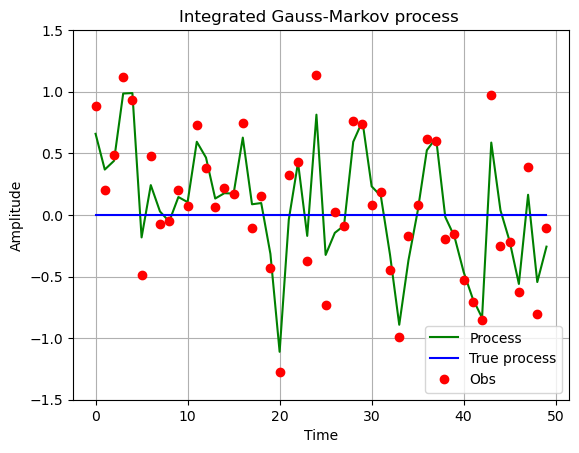

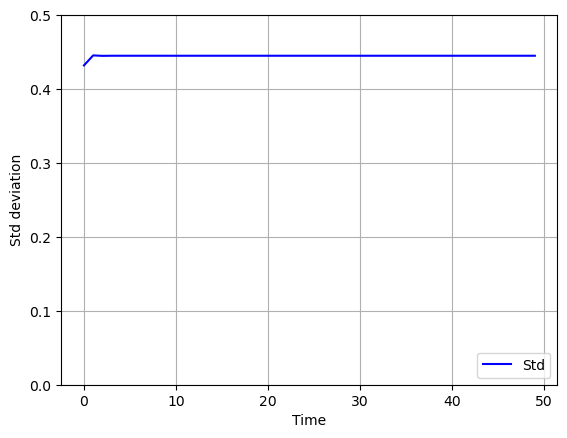

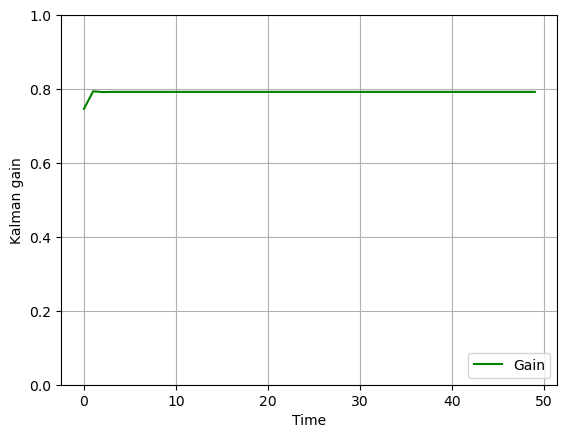

In [1]:
from numpy import array, eye, arange, sqrt
from numpy.linalg import inv
from numpy.random import normal, seed
import matplotlib.pyplot as plt
from vanloan import numeval

# Random seed
seed(0)

# System values
samples = 50
dt = 1         # second

# Process parameters
beta = 1       # 1/second
sigma = 1      # meter

# Measurement variance
r = 0.5**2     # meter^2

# Measurement covariance matrix
R = array([[r]])

# Initial state vector
x = array([[0],
           [0]])

# Initial true state vector
xt = x

# Initial state vector covariance matrix
P = array([[1e-8, 0],
           [0, sigma**2]])

# Design matrix
H = array([[1, 0]])

# System size
[n, e] = H.shape

# Dynamic matrix
F = array([[0, 1],
           [0, -beta]])

# White noise coefficients
G = array([[0],
           [sqrt(2*sigma**2*beta)]])

# Van Loan numerical evaluation
[phi, Q] = numeval(F, G, dt)

# Plot vectors
x_all = []; xt_all = []; P_all = []; K_all = []; z_all = []

# KF main loop
for k in range(0, samples):
    
    # True process
    xt = phi@xt
    
    # Generate noisy measurements (Normal distribution)
    z = H@xt + normal(0, sqrt(R))
    
    # Time update
    x = phi@x
    P = phi@P@phi.T + Q
    
    # Measurement update
    K = P@H.T@inv(H@P@H.T + R)
    x = x + K@(z - H@x)
    P = (eye(e) - K@H)@P
    
    # Accumulate plot vectors
    x_all.append(x)
    xt_all.append(xt)
    P_all.append(P)
    K_all.append(K)
    z_all.append(z)

# Extract plot values
pos = [x[0, 0] for x in x_all]
post = [xt[0, 0] for xt in xt_all]
std = [sqrt(P[0, 0]) for P in P_all]
gain = [K[0, 0] for K in K_all]
meas = [z[0, 0] for z in z_all]

# Time
time = arange(0, samples)

# Plotting process
plt.figure(1)
plt.plot(time, pos, 'g', label='Process')
plt.plot(time, post, 'b', label='True process')
plt.plot(time, meas, 'ro', label='Obs')
plt.title('Integrated Gauss-Markov process ')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.ylim(-1.5, 1.5)
plt.legend(loc='lower right')
plt.grid(True, which='both')
plt.show()

plt.figure(2)
plt.plot(time, std, 'b', label='Std')
plt.xlabel('Time')
plt.ylabel('Std deviation')
plt.ylim(0, 0.5)
plt.legend(loc='lower right')
plt.grid(True, which='both')
plt.show()

plt.figure(3)
plt.plot(time, gain, 'g', label='Gain')
plt.xlabel('Time')
plt.ylabel('Kalman gain')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.grid(True, which='both')
plt.show()